In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [19]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

In [20]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Importing Necessary Libraries

In [21]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime
from sklearn.model_selection import train_test_split

print("tensorflow version : ", tf.__version__)
print("tensorflow_hub version : ", hub.__version__)

tensorflow version :  1.15.3
tensorflow_hub version :  0.8.0


In [22]:
#Importing BERT modules
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization

## Setting The Output Directory

While fine-tuning the model, we will save the training checkpoints and the model in an output directory so that we can use the trained model for our predictions later.

In [23]:
# Set the output directory for saving model file
OUTPUT_DIR = 'model_pooled_concat_sequence_related_2_layer_ms4'

#@markdown Whether or not to clear/delete the directory and create a new one
DO_DELETE = False #@param {type:"boolean"}

if DO_DELETE:
  try:
    tf.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    pass

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: model_pooled_concat_sequence_related_2_layer_ms4 *****


## Loading The Data

In [156]:
stock='AAPL'
year='2020'

In [157]:
data=pd.read_csv('model1_data_related.csv',index_col=0)
data

,text,search_term,label0
2,"The Dow just hit 29,000. $AAPL, $GS, $UNH, $NK...",MSFT,1
3,"Microsoft beat on revenue expectations, driven...",MSFT,1
4,Tesla and Microsoft topped Wall Street earning...,MSFT,1
6,Microsoft pledges to completely remove carbon ...,Microsoft,1
11,Microsoft ex-employee says contractors in Chin...,Microsoft,1
...,...,...,...
10055,Marvel delays Doctor Strange and Thor sequels ...,Sony,1
10061,Sony told to pay BBC £5m for stock damaged in ...,Sony,1
10062,Sony invests $400 million in Chinese video sit...,Sony,1
10065,Roku shares climb 10% on strong growth in stre...,ROKU,1


In [158]:
data['label0'].value_counts()

1    4380
0     857
Name: label0, dtype: int64

In [159]:
data_flag=data['label0']
data_feature=data
data_feature.drop('label0', axis = 1, inplace = True)

In [160]:
ind=[]
data_pred=pd.read_csv(stock+'_stock_sum/'+stock+'_stock_news_'+year+'.csv')
data_pred_time=data_pred.iloc[:,[2,-1,3,5]]
data_pred=data_pred.iloc[:,[2,-1,3]]

data_pred.columns=['text','search_term','label0']
data_pred.drop(index=(data_pred[data_pred.text=='text'].index),inplace=True)
data_pred_time.drop(index=(data_pred_time[data_pred_time.text=='text'].index),inplace=True)
data_pred

,text,search_term,label0
0,"The Dow hit 29,000 today. $AAPL, $GS, $UNH, $N...",AAPL,14
1,"The Dow just hit 29,000. $AAPL, $GS, $UNH, $NK...",AAPL,55
2,One stealth technical indicator could be key t...,AAPL,6
3,And there it is. $AAPL is green,AAPL,2
4,$AAPL back above $300,AAPL,2
...,...,...,...
2042,"Top-rated companies including ­Disney, Apple a...",Apple,143
2043,Just to put things into perspective: FANGMAN (...,Apple,818
2044,Buy Boeing and Apple and enjoy the show.,Apple,1
2045,BEIJING IS READY TO TAKE COUNTERMEASURES AGAIN...,Apple,150


In [161]:
index=[]
for i in range(len(data_pred)):
    index.append(i)

In [162]:
data_pred_time.index=index
data_pred_time.to_csv(stock+'_stock_sum/'+stock+'tweets_include_time'+year+'.csv')

In [163]:
data_pred.index=index
for i in range(len(data_pred)):
    data_pred.iloc[i,-1]=0
    data_pred.iloc[i,0]=data_pred.iloc[i,0].split('http')[0]
data_pred

,text,search_term,label0
0,"The Dow hit 29,000 today. $AAPL, $GS, $UNH, $N...",AAPL,0
1,"The Dow just hit 29,000. $AAPL, $GS, $UNH, $NK...",AAPL,0
2,One stealth technical indicator could be key t...,AAPL,0
3,And there it is. $AAPL is green,AAPL,0
4,$AAPL back above $300,AAPL,0
...,...,...,...
2034,"Top-rated companies including ­Disney, Apple a...",Apple,0
2035,Just to put things into perspective: FANGMAN (...,Apple,0
2036,Buy Boeing and Apple and enjoy the show.,Apple,0
2037,BEIJING IS READY TO TAKE COUNTERMEASURES AGAIN...,Apple,0


In [164]:
data_pred_flag=data_pred['label0']
data_pred_feature=data_pred
data_pred_feature.drop('label0', axis = 1, inplace = True)

## split dataset to train test and val

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val=train_test_split(data_feature,data_flag,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test_val.shape)
print(y_train.shape)
print(y_test_val.shape)

(3665, 2)
(1572, 2)
(3665,)
(1572,)


In [166]:
X_test, X_val, y_test, y_val=train_test_split(X_test_val,y_test_val,test_size=0.33,random_state=42)
print(X_test.shape)
print(X_val.shape)
print(y_test.shape)
print(y_val.shape)

(1053, 2)
(519, 2)
(1053,)
(519,)


In [167]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(3665, 2)
(3665,)
(1053, 2)
(1053,)
(519, 2)
(519,)


In [168]:
X_pred=data_pred_feature
y_pred=data_pred_flag

In [169]:
y_train.value_counts()

1    3073
0     592
Name: label0, dtype: int64

In [170]:
search_term=list(X_train['search_term'])
len(search_term)

3665

In [171]:
X_train['label0']=X_train['search_term']
X_train['search_term']=y_train
X_train

/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,search_term,label0
9601,‘What the f*** is the matter with you?’: Welsh...,0,Zoom
8600,New for subscribers: Analysts see stocks like ...,1,Amazon
7302,Apple planning 'major 5G iPhone redesign' for ...,1,Apple
5587,A man who was awaiting results on a coronaviru...,1,JetBlue
7353,As governments race to roll out pandemic-fight...,1,Apple
...,...,...,...
6057,GM employee at Cole Engineering Center tests p...,1,GM
7316,France urges Apple and Google to ease privacy ...,1,Apple
9988,Two black men in coronavirus face masks follow...,1,Walmart
10046,"Public health officials in Aurora, Colorado, o...",1,Walmart


In [172]:
X_train['search_term'].value_counts()

1    3073
0     592
Name: search_term, dtype: int64

In [173]:
X_test['label0']=X_test['search_term']
X_test['search_term']=y_test
X_val['label0']=X_val['search_term']
X_val['search_term']=y_val

/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [174]:
X_pred['label0']=X_pred['search_term']
X_pred['search_term']=y_pred

In [175]:
train=X_train
val=X_val
test=X_test

In [176]:
pred=X_pred

In [177]:
train.columns=['clean tweet','target','search_term']
val.columns=['clean tweet','target','search_term']
test.columns=['clean tweet','target','search_term']


In [178]:
pred.columns=['clean tweet','target','search_term']

In [179]:
train

,clean tweet,target,search_term
9601,‘What the f*** is the matter with you?’: Welsh...,0,Zoom
8600,New for subscribers: Analysts see stocks like ...,1,Amazon
7302,Apple planning 'major 5G iPhone redesign' for ...,1,Apple
5587,A man who was awaiting results on a coronaviru...,1,JetBlue
7353,As governments race to roll out pandemic-fight...,1,Apple
...,...,...,...
6057,GM employee at Cole Engineering Center tests p...,1,GM
7316,France urges Apple and Google to ease privacy ...,1,Apple
9988,Two black men in coronavirus face masks follow...,1,Walmart
10046,"Public health officials in Aurora, Colorado, o...",1,Walmart


In [180]:
train['target'].value_counts()

1    3073
0     592
Name: target, dtype: int64

In [181]:
max_value=0
for i in train['target'].value_counts():
    if i>max_value:
        max_value=i
max_value

3073

In [182]:
train_0_down=train[train['target']==0].index
train_0_down

Int64Index([9601, 3287, 3517, 7428, 6366, 5396, 5303, 8907, 3751, 5160,
            ...
            9443, 3991, 1631,  501, 5631,  420, 5393, 4150, 5055, 6669],
           dtype='int64', length=592)

In [183]:
train_1_down=train[train['target']==1].index
train_1_down

Int64Index([ 8600,  7302,  5587,  7353,  9201,  9939,  6149,  4192,  8478,
             5336,
            ...
              311,  5686,  6195,  8546,   930,  6057,  7316,  9988, 10046,
             1787],
           dtype='int64', length=3073)

In [184]:
train2=list(train_0_down)+list(train_0_down)

In [185]:
len(train2)

1184

In [186]:
import random
if (max_value-len(train_0_down))<=len(train_0_down):
    slice1 = random.sample(list(train_0_down), max_value-len(train_0_down))
else:
    num=int(max_value/len(train_0_down))
    train2=list(train_0_down)
    for i in range(num):
        train2=train2+list(train_0_down)
    slice1 = random.sample(train2, max_value-len(train_0_down))

In [187]:
if (max_value-len(train_1_down))<=len(train_1_down):
    slice2 = random.sample(list(train_1_down), max_value-len(train_1_down))
else:
    num=int(max_value/len(train_1_down))
    train3=list(train_1_down)
    for i in range(num):
        train3=train3+list(train_1_down)
    slice2 = random.sample(train3, max_value-len(train_1_down))

In [188]:
slice4=slice1+slice2

In [189]:
for i in slice4:
    df=train[train.index==i]
    df.index=df.index+15000
    train=pd.concat([train,df])

In [190]:
train['target'].value_counts()

1    3073
0    3073
Name: target, dtype: int64

In [191]:
print("Training Set Shape :", train.shape)
print("Validation Set Shape :", val.shape)
print("Test Set Shape :", test.shape)

Training Set Shape : (6146, 3)
Validation Set Shape : (519, 3)
Test Set Shape : (1053, 3)


In [192]:
#unique classes
train['target'].unique()

array([0, 1])

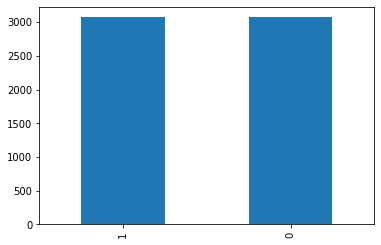

In [193]:
#Distribution of classes
train['target'].value_counts().plot(kind = 'bar')

In [194]:
DATA_COLUMN = 'clean tweet'
LABEL_COLUMN = 'target'
# The list containing all the classes (train['SECTION'].unique())
label_list = [0, 1]

In [195]:
redeal=['ZM','XOM','Walmart','Virgin Galactic','United Airlines','USO','Spirit Airlines','Southwest Airlines',
 'SIRI','Royal Caribbean','ROKU','Pfizer','Occidental Petroleum','Norwegian Cruise Line','New Residential','Moderna','Marathon Oil',
 'Luckin Coffee','LYFT','LUV','LK','JetBlue','JPM','Halliburton','Groupon','GoPro','Gilead Sciences','Fitbit','Exxon Mobil',
 'Energy Transfer','Delta Air Lines','Coca-Cola','Canopy Growth','CCL','Beyond Meat','Berkshire Hathaway','Bank of America','BYND',
 'Aurora Cannabis','American Airlines','Alibaba','AMD','DIS']

In [196]:
for i in range(len(train)):
    if train.iloc[i,2] in redeal:
        cleaning=train.iloc[i,0].lower()
        cleaning2=train.iloc[i,2].lower()
        tweets=cleaning.replace(cleaning2,'presentation')
        train.iloc[i,0]=tweets
        train.iloc[i,2]='presentation'
train

,clean tweet,target,search_term
9601,‘What the f*** is the matter with you?’: Welsh...,0,Zoom
8600,New for subscribers: Analysts see stocks like ...,1,Amazon
7302,Apple planning 'major 5G iPhone redesign' for ...,1,Apple
5587,a man who was awaiting results on a coronaviru...,1,presentation
7353,As governments race to roll out pandemic-fight...,1,Apple
...,...,...,...
22964,Chinese state media is flooding Facebook and I...,0,Facebook
22968,Family members posted several tributes to Pete...,0,Facebook
19306,Nessun paese è stato colpito dal coronavirus c...,0,DAL
20612,YouTube and Amazon Prime join Netflix by reduc...,0,Amazon


In [197]:
for i in range(len(val)):
    if val.iloc[i,2] in redeal:
        cleaning=val.iloc[i,0].lower()
        cleaning2=val.iloc[i,2].lower()
        tweets=cleaning.replace(cleaning2,'presentation')
        val.iloc[i,0]=tweets
        val.iloc[i,2]='presentation'
val

/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,clean tweet,target,search_term
2144,#BREAKING: Ukrainian Prime Minister Oleksiy Ho...,0,Facebook
2478,Amazon slated to report fourth-quarter earning...,1,Amazon
10051,two workers at a chicago-area presentation sto...,1,presentation
7852,Missouri city offers $1 billion in incentives ...,1,Tesla
6902,Ford's three-part unsecured debt offering wort...,1,Ford
...,...,...,...
2418,"“the objective is not no plastics, it’s zero w...",1,presentation
8701,Amazon said it was investigating claims of 'su...,1,Amazon
1136,Boeing 737 crash in Tehran kills 176,1,Boeing
2108,Facebook apologises for offensive translation ...,1,Facebook


In [198]:
for i in range(len(test)):
    if test.iloc[i,2] in redeal:
        cleaning=test.iloc[i,0].lower()
        cleaning2=test.iloc[i,2].lower()
        tweets=cleaning.replace(cleaning2,'presentation')
        test.iloc[i,0]=tweets
        test.iloc[i,2]='presentation'
test

/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,clean tweet,target,search_term
5870,Which companies are benefiting most from the c...,1,Amazon
8465,“i do think there’s such a pent-up demand for ...,1,presentation
7988,Facebook stops advertisers from being able to ...,1,Facebook
3296,"For the second time in the United States, a ba...",0,PENN
4324,Carnival cancels cruises amid coronavirus outb...,1,Carnival
...,...,...,...
5154,Newspaper shocks readers by publishing full na...,0,Facebook
8284,Zoom hires former Facebook security chief to b...,1,Facebook
5059,Elon Musk’s contrarian streak built Tesla. Was...,1,Tesla
6743,"some 35,000 elderly mexicans, most between 60 ...",1,presentation


In [199]:
for i in range(len(pred)):
    if pred.iloc[i,2] in redeal:
        cleaning=test.iloc[i,0].lower()
        cleaning2=test.iloc[i,2].lower()
        tweets=cleaning.replace(cleaning2,'presentation')
        pred.iloc[i,0]=tweets
        pred.iloc[i,2]='presentation'
pred

,clean tweet,target,search_term
0,"The Dow hit 29,000 today. $AAPL, $GS, $UNH, $N...",0,AAPL
1,"The Dow just hit 29,000. $AAPL, $GS, $UNH, $NK...",0,AAPL
2,One stealth technical indicator could be key t...,0,AAPL
3,And there it is. $AAPL is green,0,AAPL
4,$AAPL back above $300,0,AAPL
...,...,...,...
2034,"Top-rated companies including ­Disney, Apple a...",0,Apple
2035,Just to put things into perspective: FANGMAN (...,0,Apple
2036,Buy Boeing and Apple and enjoy the show.,0,Apple
2037,BEIJING IS READY TO TAKE COUNTERMEASURES AGAIN...,0,Apple


## Data Preprocessing

BERT model accept only a specific type of input and the datasets are usually structured to have the following four features:

* guid : A unique id that represents an observation.
* text_a : The text we need to classify into given categories
* text_b: It is used when we're training a model to understand the relationship between sentences and it does not apply for classification problems.
* label: It consists of the labels or classes or categories that a given text belongs to.
 
In our dataset we have text_a and label. The following code block will create objects for each of the above mentioned features for all the records in our dataset using the InputExample class provided in the BERT library.


In [200]:
train_InputExamples = train.apply(lambda x: bert.run_classifier.InputExample(guid=None,
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

val_InputExamples = val.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [201]:
test_InputExamples = test.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [202]:
pred_InputExamples = pred.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [203]:
print("### Row 0 - guid of training set : ", train_InputExamples.iloc[0].guid)
print("\n### Row 0 - text_a of training set : \n", train_InputExamples.iloc[0].text_a)
print("\n### Row 0 - text_b of training set : ", train_InputExamples.iloc[0].text_b)
print("\n### Row 0 - label of training set : ", train_InputExamples.iloc[0].label)

### Row 0 - guid of training set :  None

### Row 0 - text_a of training set : 
 ‘What the f*** is the matter with you?’: Welsh health minister swears about colleague while unmuted during Zoom cabinet meeting 

### Row 0 - text_b of training set :  None

### Row 0 - label of training set :  0


## Tokenizing Texts

We will now get down to business with the pretrained BERT.  In this example we will use the ```bert_uncased_L-12_H-768_A-12/1``` model. To check all available versions click [here](https://tfhub.dev/s?network-architecture=transformer&publisher=google).

We will be using the vocab.txt file in the model to map the words in the dataset to indexes. Also the loaded BERT model is trained on uncased/lowercase data and hence the data we feed to train the model should also be of lowercase.

---

The following code block loads the pre-trained BERT model and initializers a tokenizer object for tokenizing the texts.


In [73]:
# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
        
    # !!! this is time-consuming as the model is giant !!!
    bert_module = hub.Module(BERT_MODEL_HUB) # second time is fast as the module is cached
    
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [74]:
tokenizer.tokenize("all bed Boeing apmaskfor airline")

['all', 'bed', 'boeing', 'ap', '##mas', '##k', '##for', 'airline']

In [75]:
#Here is what the tokenised sample of the first training set observation looks like
print(tokenizer.tokenize(train_InputExamples.iloc[0].text_a))

['‘', 'what', 'the', 'f', '*', '*', '*', 'is', 'the', 'matter', 'with', 'you', '?', '’', ':', 'welsh', 'health', 'minister', 'swear', '##s', 'about', 'colleague', 'while', 'un', '##mute', '##d', 'during', 'zoom', 'cabinet', 'meeting']


In [204]:
train_part=train
train_part

,clean tweet,target,search_term
9601,‘What the f*** is the matter with you?’: Welsh...,0,Zoom
8600,New for subscribers: Analysts see stocks like ...,1,Amazon
7302,Apple planning 'major 5G iPhone redesign' for ...,1,Apple
5587,a man who was awaiting results on a coronaviru...,1,presentation
7353,As governments race to roll out pandemic-fight...,1,Apple
...,...,...,...
22964,Chinese state media is flooding Facebook and I...,0,Facebook
22968,Family members posted several tributes to Pete...,0,Facebook
19306,Nessun paese è stato colpito dal coronavirus c...,0,DAL
20612,YouTube and Amazon Prime join Netflix by reduc...,0,Amazon


In [205]:
val_part=val
val_part

,clean tweet,target,search_term
2144,#BREAKING: Ukrainian Prime Minister Oleksiy Ho...,0,Facebook
2478,Amazon slated to report fourth-quarter earning...,1,Amazon
10051,two workers at a chicago-area presentation sto...,1,presentation
7852,Missouri city offers $1 billion in incentives ...,1,Tesla
6902,Ford's three-part unsecured debt offering wort...,1,Ford
...,...,...,...
2418,"“the objective is not no plastics, it’s zero w...",1,presentation
8701,Amazon said it was investigating claims of 'su...,1,Amazon
1136,Boeing 737 crash in Tehran kills 176,1,Boeing
2108,Facebook apologises for offensive translation ...,1,Facebook


In [206]:
test_part=test
test_part

,clean tweet,target,search_term
5870,Which companies are benefiting most from the c...,1,Amazon
8465,“i do think there’s such a pent-up demand for ...,1,presentation
7988,Facebook stops advertisers from being able to ...,1,Facebook
3296,"For the second time in the United States, a ba...",0,PENN
4324,Carnival cancels cruises amid coronavirus outb...,1,Carnival
...,...,...,...
5154,Newspaper shocks readers by publishing full na...,0,Facebook
8284,Zoom hires former Facebook security chief to b...,1,Facebook
5059,Elon Musk’s contrarian streak built Tesla. Was...,1,Tesla
6743,"some 35,000 elderly mexicans, most between 60 ...",1,presentation


In [207]:
pred_part=pred
pred_part

,clean tweet,target,search_term
0,"The Dow hit 29,000 today. $AAPL, $GS, $UNH, $N...",0,AAPL
1,"The Dow just hit 29,000. $AAPL, $GS, $UNH, $NK...",0,AAPL
2,One stealth technical indicator could be key t...,0,AAPL
3,And there it is. $AAPL is green,0,AAPL
4,$AAPL back above $300,0,AAPL
...,...,...,...
2034,"Top-rated companies including ­Disney, Apple a...",0,Apple
2035,Just to put things into perspective: FANGMAN (...,0,Apple
2036,Buy Boeing and Apple and enjoy the show.,0,Apple
2037,BEIJING IS READY TO TAKE COUNTERMEASURES AGAIN...,0,Apple


In [208]:
search_dict={'msft':'microsoft','ford':'ford','ge':'general electric','dis':'disney','aal':'american airlines','dal':'delta air lines',\
               'gpro':'gopro','ccl':'carnival','aapl':'apple','fitbit':'fitbit','plug':'plug power','bac':'bank of america',\
               'snap':'snap','nclh':'norwegian cruise line','ba':'boeing','ino':'inovio','ual':'united airlines','cgc':\
                'canopy growth','uber':'uber','rcl':'royal caribbean','cron':'cronos group','amd':'amd','twtr':'twtr','tsla':\
               'tesla','grpn':'groupon','fb':'facebook','acb':'aurora cannabis','sbux':'starbucks','mro':'marathon oil','delta':'delta',\
                'znga':'zynga','baba':'alibaba','uso':'united states oil fund','ko':'coca-cola','apha':'aphria','dow':'dow',\
                'xom':'exxon mobil','mfa':'mfa','jblu':'jetblue','amzn':'amazon','luv':'southwest airlines','nio':'nio','mrna':'moderna',\
                'gm':'general motor','spirit airlines':'spirit Airlines','mgm':'mgm','gild':'gilead sciences','nflx':'netflix','nrz':'new residential','spce':\
                'virgin galactic','lk':'luckin coffee','vslr':'vivint solar','uco':'uco','voo':'vanguard','penn':'penn','amc':'amc','tlry':\
                'tilray','hal':'halliburton','nok':'nokia','lyft':'lyft','nvda':'nvidia','cprx':'catalyst pharmaceuticals','spy':\
                'spdr s&p 500 etf','nke':'nike','sq':'sq','visa':'visa','siri':'siri','brk.b':'berkshire hathaway','cpe':'callon petroleum',\
                'slack':'slack','gush':'gush','bynd':'beyond meat','pfe':'pfizer','oxy':'occidental petroleum','kos':'kos','mcd': 'mcdonald',\
                'energy transfer':'energy transfer','crbp':'corbus pharmaceuticals','sphd':'sphd','ntdoy':'nintendo','zm':'zoom','jpm':'jpm',\
                'vktx':'viking therapeutics','ibm':'ibm','nymt':'nymt','intc':'intel','wmt':'walmart','sne':'sony','roku':'roku','presentation':'presentation'}
search_dict

{'msft': 'microsoft',
 'ford': 'ford',
 'ge': 'general electric',
 'dis': 'disney',
 'aal': 'american airlines',
 'dal': 'delta air lines',
 'gpro': 'gopro',
 'ccl': 'carnival',
 'aapl': 'apple',
 'fitbit': 'fitbit',
 'plug': 'plug power',
 'bac': 'bank of america',
 'snap': 'snap',
 'nclh': 'norwegian cruise line',
 'ba': 'boeing',
 'ino': 'inovio',
 'ual': 'united airlines',
 'cgc': 'canopy growth',
 'uber': 'uber',
 'rcl': 'royal caribbean',
 'cron': 'cronos group',
 'amd': 'amd',
 'twtr': 'twtr',
 'tsla': 'tesla',
 'grpn': 'groupon',
 'fb': 'facebook',
 'acb': 'aurora cannabis',
 'sbux': 'starbucks',
 'mro': 'marathon oil',
 'delta': 'delta',
 'znga': 'zynga',
 'baba': 'alibaba',
 'uso': 'united states oil fund',
 'ko': 'coca-cola',
 'apha': 'aphria',
 'dow': 'dow',
 'xom': 'exxon mobil',
 'mfa': 'mfa',
 'jblu': 'jetblue',
 'amzn': 'amazon',
 'luv': 'southwest airlines',
 'nio': 'nio',
 'mrna': 'moderna',
 'gm': 'general motor',
 'spirit airlines': 'spirit Airlines',
 'mgm': 'mgm',

In [209]:
len(train_InputExamples)

6146

In [210]:
binar=[]
nodrop_index=[]
errr=0
for i in range (len(train_InputExamples)):
    c=[]
    for j in tokenizer.tokenize(train_InputExamples.iloc[i].text_a):
        #print(j)
        search_1=train_part['search_term'].iloc[i]
        if search_1.lower() in search_dict.keys():
            search_2=search_dict[search_1.lower()]
        else:
            search_2=list(search_dict.keys())[list(search_dict.values()).index(search_1.lower())]
        if j == search_1.lower() or j == search_2:
            c.append(1)
        else:
            c.append(0)
    if search_1=='presentation':
        train_part['search_term'].iloc[i]='[MASK]'
        train_InputExamples.iloc[3].text_a=train_InputExamples.iloc[3].text_a.replace('presentation','[MASK]')
    if sum(c)!=0:
        nodrop_index.append(i)
        binar.append(c)

/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [212]:
train_InputExamples=train_InputExamples.iloc[nodrop_index]

In [213]:
len(train_InputExamples)

5809

In [215]:
binar2=[]
for i in range (len(val_InputExamples)):
    c=[]
    for j in tokenizer.tokenize(val_InputExamples.iloc[i].text_a):
        search_1=val_part['search_term'].iloc[i]    
        if search_1.lower() in search_dict.keys():
            search_2=search_dict[search_1.lower()]
        else:
            search_2=list(search_dict.keys())[list(search_dict.values()).index(search_1.lower())]
        if j==search_1.lower() or j==search_2:
            c.append(1)
        else:
            c.append(0)
    if search_1=='presentation':
        val_part['search_term'].iloc[i]='[MASK]'
        val_InputExamples.iloc[3].text_a=val_InputExamples.iloc[3].text_a.replace('presentation','[MASK]')
    binar2.append(c)

/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [216]:
binar3=[]
for i in range (len(test_InputExamples)):
    c=[]
    for j in tokenizer.tokenize(test_InputExamples.iloc[i].text_a):
        search_1=test_part['search_term'].iloc[i]    
        if search_1.lower() in search_dict.keys():
            search_2=search_dict[search_1.lower()]
        else:
            search_2=list(search_dict.keys())[list(search_dict.values()).index(search_1.lower())]
        if j==search_1.lower() or j==search_2:
            c.append(1)
        else:
            c.append(0)
    if search_1=='presentation':
        test_part['search_term'].iloc[i]='[MASK]'
        test_InputExamples.iloc[3].text_a=test_InputExamples.iloc[3].text_a.replace('presentation','[MASK]')
    binar3.append(c)

/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/dongyingzhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [217]:
binar4=[]
for i in range (len(pred_InputExamples)):
    c=[]
    for j in tokenizer.tokenize(pred_InputExamples.iloc[i].text_a):
        search_1=pred_part['search_term'].iloc[i]    
        if search_1.lower() in search_dict.keys():
            search_2=search_dict[search_1.lower()]
        else:
            search_2=list(search_dict.keys())[list(search_dict.values()).index(search_1.lower())]
        if j==search_1.lower() or j==search_2:
            c.append(1)
        else:
            c.append(0)
    if search_1=='presentation':
        pred_part['search_term'].iloc[i]='[MASK]'
        pred_InputExamples.iloc[3].text_a=pred_InputExamples.iloc[3].text_a.replace('presentation','[MASK]')
    binar4.append(c)

In [ ]:
import numpy as np
for i in binar:
     while len(i)<128:
        i.append(0)
binar=np.array(binar)

In [ ]:
for i in binar2:
     while len(i)<128:
        i.append(0)
binar2=np.array(binar2)

In [ ]:
for i in binar3:
     while len(i)<128:
        i.append(0)
binar3=np.array(binar3)

In [ ]:
binar5=[]
for i in binar4:
    if len(i)>128:
        i=i[:128]  
        binar5.append(i)
    else:
        while len(i)<128:
            i.append(0)
        binar5.append(i)
binar5=np.array(binar5)

We will now format out text in to input features which the BERT model expects. We will also set a sequence length which will be the length of the input features.

# Model Creation

In [ ]:
# We'll set sequences to be at most 128 tokens long.
MAX_SEQ_LENGTH = 128

# Convert our train and validation features to InputFeatures that BERT understands.
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

val_features = bert.run_classifier.convert_examples_to_features(val_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

In [ ]:
test_features = bert.run_classifier.convert_examples_to_features(test_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

In [ ]:
pred_features = bert.run_classifier.convert_examples_to_features(pred_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

In [ ]:
for i in range(len(train_features)):
    train_features[i].binary_seq=list(binar[i])

In [ ]:
for i in range(len(val_features)):
    val_features[i].binary_seq=list(binar2[i])

In [ ]:
for i in range(len(test_features)):
    test_features[i].binary_seq=list(binar3[i])

In [ ]:
for i in range(len(pred_features)):
    pred_features[i].binary_seq=list(binar5[i])

In [ ]:
#Example on first observation in the training set
print("### Text : \n", train_InputExamples.iloc[0].text_a)
print("-"*30)
print("### Input IDs : ", train_features[0].input_ids)
print("-"*30)
print("### Input Masks : ", train_features[0].input_mask)
print("-"*30)
print("### Segment IDs : ", train_features[0].segment_ids)
print("-"*30)
print("### binary_seq : ", train_features[0].binary_seq)

## Creating a Multi-Class Classifier Model

In [ ]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels,binary_seq):
  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens", # bert_inputs records tokens
      as_dict=True) # bert_inputs is a dict

  # !!! Use "pooled_output" for classification tasks on an entire sentence. ---> adopted for classification
  # !!! Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]
  word_layer = bert_outputs["sequence_output"]

  binary_seq=tf.expand_dims(binary_seq, 2)
  word_layer = tf.multiply(word_layer, binary_seq)
  word_layer=tf.reduce_sum(word_layer,axis=1)
  #output_layer=tf.concat([output_layer,word_layer],axis=1)

  hidden_size = output_layer.shape[-1].value
  middle_size=[32,64,128,256,512]
  # Create our own layer to tune for politeness data.
  """
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())
  """
  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)
    word_layer = tf.nn.dropout(word_layer, keep_prob=0.9)
    #print(output_layer.shape)
    #print(word_layer.shape)
    output_layer = tf.layers.dense(output_layer, middle_size[4], activation=tf.nn.relu)#add part
    word_layer = tf.layers.dense(word_layer, middle_size[4], activation=tf.nn.relu)
    #print(output_layer.shape)
    #print(word_layer.shape)
    logits=tf.concat([output_layer,word_layer],axis=1)
    #print(logits.shape)
    logits_out=logits
    logits = tf.layers.dense(logits, num_labels)#add part
    #print(logits.shape)
    log_probs = tf.nn.log_softmax(logits, axis=-1)
    

   
    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)
    #print("one_hot_labels:",one_hot_labels.shape)
    
    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    #print("predicted_labels:",predicted_labels.shape)
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs,logits_out)
    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)

In [ ]:
# A function that adapts our model to work for training, evaluation, and prediction.

# model_fn_builder actually creates our model function
# using the passed parameters for num_labels, learning_rate, etc.
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""
    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]
    binary_seq = features["binary_seq"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)

    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels,binary_seq)
      
      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        #auc = tf.metrics.auc(label_ids, predicted_labels)
        precision=tf.metrics.precision(label_ids, predicted_labels)
        recall=tf.metrics.recall(label_ids, predicted_labels)
        #specificity_at_sensitivity=tf.metrics.specificity_at_sensitivity(label_ids, predicted_labels)
        #CategoricalCrossentropy=tf.keras.metrics.CategoricalCrossentropy(label_ids, predicted_labels)
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        
        return {
            "eval_accuracy": accuracy,
            #"auc":auc,
            "precision":precision,
            "recall":recall,
            #"specificity_at_sensitivity":specificity_at_sensitivity,
            #"CategoricalCrossentropy":CategoricalCrossentropy,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg
            }
      eval_metrics = metric_fn(label_ids, predicted_labels)
      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:

          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)

    else:
      
      (predicted_labels, log_probs,logits_out) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels,binary_seq)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels,
          'logits_out': logits_out
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn


In [ ]:
# Compute train and warmup steps from batch size
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 4.0
# Warmup is a period of time where the learning rate is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 300
SAVE_SUMMARY_STEPS = 100

# Compute train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [ ]:
#Initializing the model and the estimator
model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE}) #,"max_lenth":MAX_SEQ_LENGTH


In [ ]:
def input_fn_builder(features, seq_length, is_training, drop_remainder):
  """Creates an `input_fn` closure to be passed to TPUEstimator."""

  all_input_ids = []
  all_input_mask = []
  all_segment_ids = []
  all_label_ids = []
  all_binary_seq = []
  for feature in features:
    
    all_input_ids.append(feature.input_ids)
    all_input_mask.append(feature.input_mask)
    all_segment_ids.append(feature.segment_ids)
    all_label_ids.append(feature.label_id)
    all_binary_seq.append(feature.binary_seq)
  def input_fn(params):
    """The actual input function."""
    batch_size = params["batch_size"]

    num_examples = len(features)

    # This is for demo purposes and does NOT scale to large data sets. We do
    # not use Dataset.from_generator() because that uses tf.py_func which is
    # not TPU compatible. The right way to load data is with TFRecordReader.
    d = tf.data.Dataset.from_tensor_slices({
        "input_ids":
            tf.constant(
                all_input_ids, shape=[num_examples, seq_length],
                dtype=tf.int32),
        "input_mask":
            tf.constant(
                all_input_mask,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "segment_ids":
            tf.constant(
                all_segment_ids,
                shape=[num_examples, seq_length],
                dtype=tf.int32),
        "label_ids":
            tf.constant(all_label_ids, shape=[num_examples], dtype=tf.int32),
        "binary_seq":
            tf.constant(
                all_binary_seq, 
                shape=[num_examples, seq_length],
                dtype=tf.float32)
    })

    if is_training:
      d = d.repeat()
      d = d.shuffle(buffer_size=100)

    d = d.batch(batch_size=batch_size, drop_remainder=drop_remainder)
    return d

  return input_fn

we will now create an input builder function that takes our training feature set (`train_features`) and produces a generator. This is a pretty standard design pattern for working with Tensorflow [Estimators](https://www.tensorflow.org/guide/estimators).

In [ ]:
# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

# Create an input function for validating. drop_remainder = True for using TPUs.


In [ ]:
val_input_fn = input_fn_builder(
    features=val_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [ ]:
test_input_fn = input_fn_builder(
    features=test_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

In [ ]:
pred_input_fn = input_fn_builder(
    features=pred_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

## Training & Evaluating

In [ ]:
# Training the model
print(f'Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)#
print("Training took time ", datetime.now() - current_time)

In [ ]:
#Evaluating the model with Validation set
#estimator.evaluate(input_fn=val_input_fn, steps=None)

## Predicting For Test Set

In [ ]:
# A method to get predictions
def getPrediction2(in_sentences,pred_input_fn):
  # Transforming the test data into BERT accepted form
  input_examples = [run_classifier.InputExample(guid="", text_a = x, text_b = None, label = 1) for x in in_sentences] 
  
  # Creating input features for Test data
  predictions=estimator.predict(input_fn=pred_input_fn)
  return [(sentence, prediction['labels'],prediction['logits_out']) for sentence, prediction in zip(in_sentences, predictions)]

In [ ]:
pred_sentences = list(pred['clean tweet'])
predictions = getPrediction2(pred_sentences,pred_input_fn)
predictions[0]

In [ ]:
relate=[]
for i in range(len(predictions)):
    relate.append(predictions[i][1])
relate=np.array(relate)
relate.shape

In [ ]:
np.save(stock+"_stock_sum/"+"relate_"+stock+"_"+year+".npy", relate)
print(stock+"_stock_sum/"+"relate_"+stock+"_"+year+".npy"+" done")

In [ ]:
pred_sentences = list(test['clean tweet'])
predictions = getPrediction2(pred_sentences,test_input_fn)
predictions[0]

In [ ]:
enc_labels = []
texts = []
for i in range(len(predictions)):
  enc_labels.append(label_list[predictions[i][1]]) # [0, 1] 
  texts.append(predictions[i][0].replace('\n', ' '))

import numpy as np
table = pd.DataFrame({'Text':texts, 'Label':enc_labels, 'True':test['target']})

In [ ]:
test['target'].value_counts()

In [ ]:
table

In [ ]:
table['True'].value_counts()

In [ ]:
table['Label'].value_counts()

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(table['True'], table['Label'])

# Reference:
Most of the code has been taken from the following resource:

* https://colab.research.google.com/github/google-research/bert/blob/master/predicting_movie_reviews_with_bert_on_tf_hub.ipynb
* https://analyticsindiamag.com/step-by-step-guide-to-implement-multi-class-classification-with-bert-tensorflow/
* https://github.com/AmalVijayan/BERT-For-Multi-Class-Classification
